In [ ]:

import warnings
import numpy as np
import matplotlib.pyplot as plt
import imageio

warnings.simplefilter(action='ignore', category=Warning)
warnings.filterwarnings('ignore')


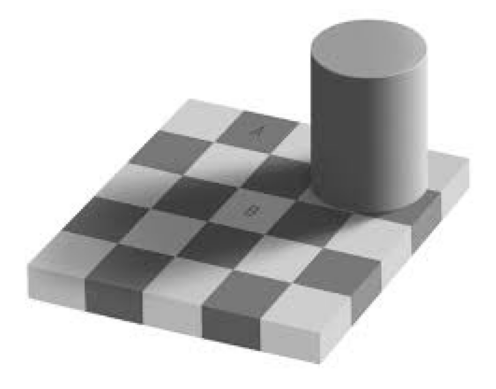

In [1]:

def display_image(image, axis='off'):
    plt.imshow(image)
    plt.axis(axis)  
    plt.show()

def display_diff(image, modified, axis='off'):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Modified')
    plt.imshow(modified)
    plt.axis('off')
    plt.show()
    
damier = imageio.imread('damier_ng.jpeg')
imageio.imwrite('damier_ng.png', damier)

display_image(damier)


In [2]:

paysage = imageio.imread('paysage_zen.png')
paysage.shape


(432, 1426, 3)

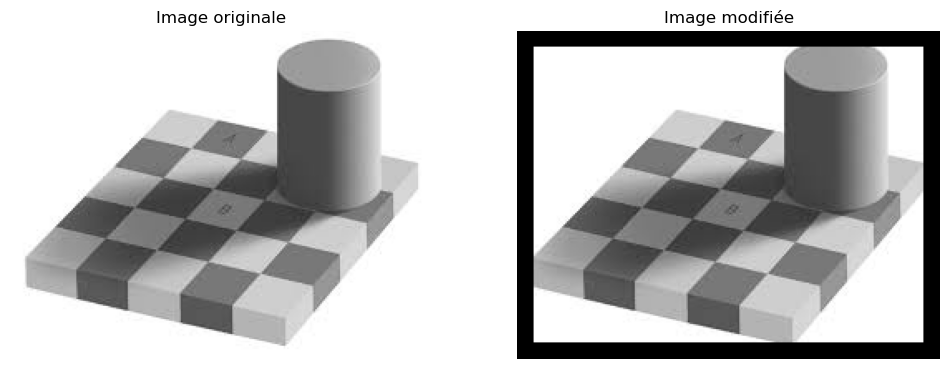

In [14]:

image = imageio.imread('damier_ng.jpeg')

def add_border(im, k):
    im_tmp = im.copy()
    im_tmp[:,:k] = 0
    im_tmp[:,-k:] = 0
    im_tmp[:k,:] = 0
    im_tmp[-k:,:] = 0         
    
    return(im_tmp)

bordered = add_border(image, 10)

display_diff(image, bordered)


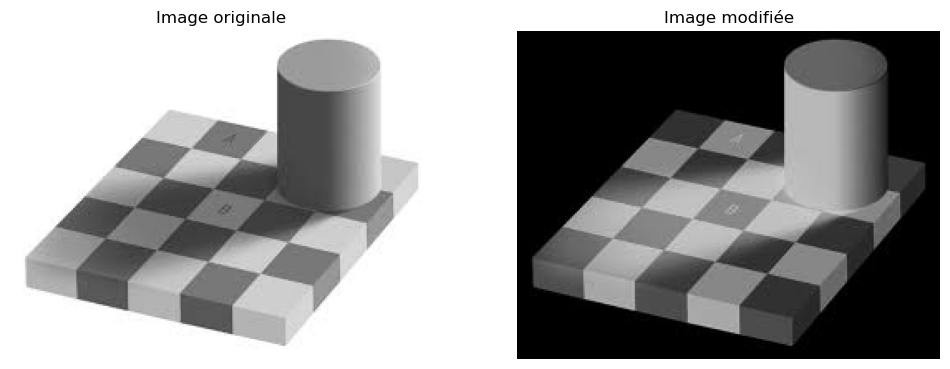

In [5]:

def inverse_intensity(im):
    im_tmp = im.copy()
    im_tmp = 255 - im_tmp    
    
    return(im_tmp)

inversed = inverse_intensity(image)

display_diff(image, inversed)


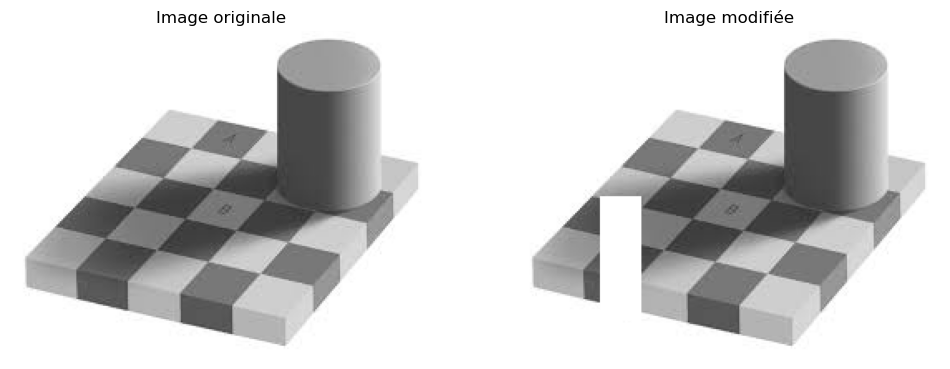

In [15]:

def mask(im, pos, dim):
    im_tmp = im.copy()
    im_tmp[pos[0]:pos[0] + dim[0], pos[1]:pos[1] + dim[1]] = 255   
    
    return(im_tmp)

masked = mask(image, [100, 50], [75, 25])

display_diff(image, masked)


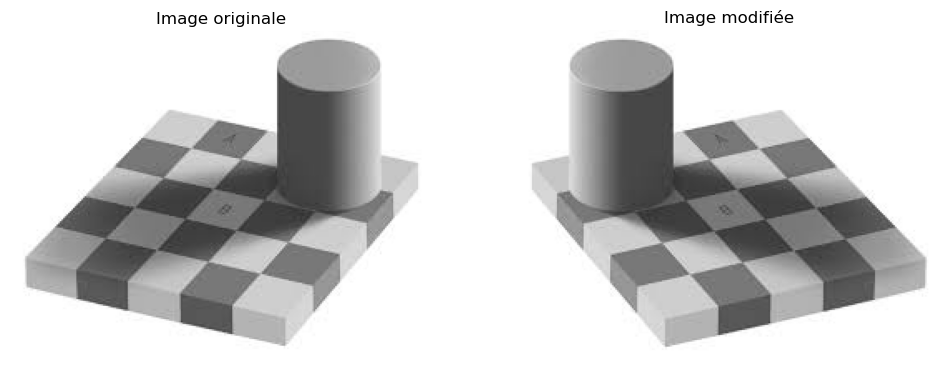

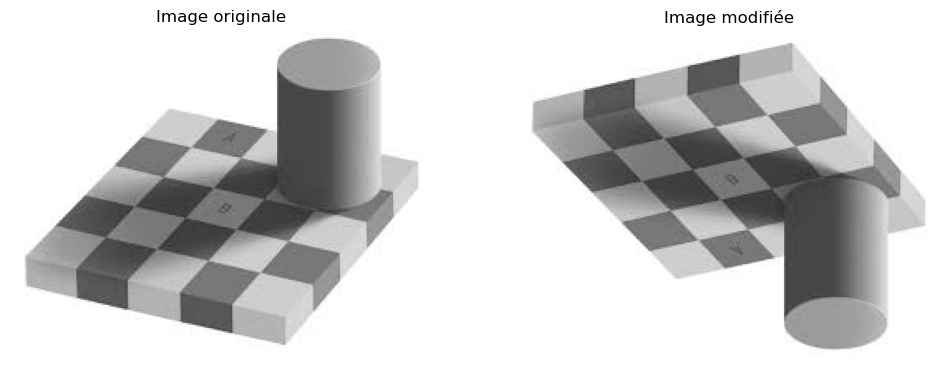

In [16]:

def mirror(im, direction='v'):
    if direction == 'v':
        mirrored = im[:, ::-1]
    elif direction == 'h':
        mirrored = im[::-1, :]
    else:
        raise ValueError("Direction should be 'v' or 'h'")
    
    return mirrored

def mirror_2(im, v = True):
    im_tmp = im.copy()
    if v:
        im_tmp = im_tmp[:,np.arange(im_tmp.shape[1]-1,0,-1)]
    else:
        im_tmp = im_tmp[np.arange(im_tmp.shape[0]-1,0,-1),:]
        
    return(im_tmp)

# mirrored_vertical = mirror(image)
# mirrored_horizontal = mirror(image, 'h')
mirrored_vertical = mirror_2(image)
mirrored_horizontal = mirror_2(image, False)

display_diff(image, mirrored_vertical)
display_diff(image, mirrored_horizontal)


[[0.01 0.02 0.04 0.02 0.01]
 [0.02 0.04 0.08 0.04 0.02]
 [0.04 0.08 0.16 0.08 0.04]
 [0.02 0.04 0.08 0.04 0.02]
 [0.01 0.02 0.04 0.02 0.01]]


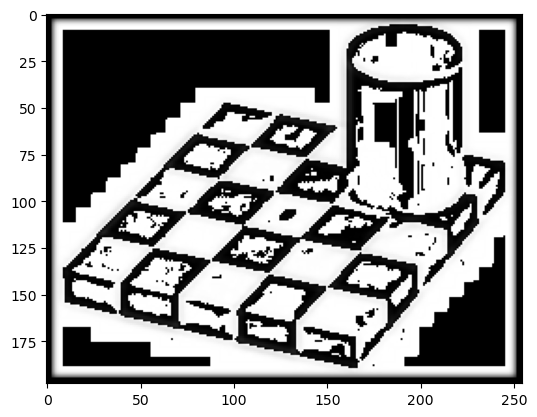

In [30]:

K = np.array([[1,2,4,2,1], [2,4,8,4,2], [4,8,16,8,4], [2,4,8,4,2], [1,2,4,2,1]]) / 100.0

print(K)

def filtrer(im, K):
    im_temp = im.copy()*0
    s = int((K.shape[0]+1)/2)
    for i in range(s,im.shape[0]-s):
        for j in range(s,im.shape[1]-s):
            im_temp[i,j] = np.sum(K*im[i-(s-1):i+s,j-(s-1):j+s])
    return(im_temp)

# plt.imshow(filtrer(filtrer(filtrer(damier[:,:,0],K),K),K), cmap = "gray")

one_filter = filtrer(damier[:,:,0], K)
three_filters = filtrer(filtrer(filtrer(one_filter, K), K), K)

plt.imshow((three_filters - one_filter), cmap='gray')
